# Vessel boost toolbox

## 1. Initinal training

If you are working outside of a container, you can store you data under *data* folder as the instruction below. If you are working inside a container, you can mount your data folder to *./data/train/* and  *./data/label/*.

Please make sure that the name of a segmentation image file should contain the FULL NAME of its corresponding MRI image. 
e.g.:

**Raw image:** TOF_3895.nii.gz

**Segmentation image:** seg_TOF_3895.nii.gz or TOF_3895_seg.nii.gz, just make sure it contains the "TOF_3895".

In [2]:
# Set the necessary parameters
# If you set prep_mode to 4, which means no preprocessing will happen, then you don't have to set a path to store the preprocessed images
!python ./../train.py --ds_path ./../../data/img/ --lb_path ./../../data/seg/ --prep_mode 4 --ep 10 --lr 1e-3 --outmo ./../saved_models/test_model

Training session will start shortly..
Aborting the preprocessing procedure!

All images have been loaded, the training process will start soon!
Epoch: [1/10], Loss:  0.9895, Current learning rate:  0.00100000                
Epoch: [2/10], Loss:  0.9787, Current learning rate:  0.00100000                
Epoch: [3/10], Loss:  0.9690, Current learning rate:  0.00100000                
Epoch: [4/10], Loss:  0.9739, Current learning rate:  0.00100000                
Epoch: [5/10], Loss:  0.9615, Current learning rate:  0.00100000                
Epoch: [6/10], Loss:  0.9565, Current learning rate:  0.00100000                
Epoch: [7/10], Loss:  0.9710, Current learning rate:  0.00100000                
Epoch: [8/10], Loss:  0.9659, Current learning rate:  0.00100000                
Epoch: [9/10], Loss:  0.9742, Current learning rate:  0.00095000                
Epoch: [10/10], Loss:  0.9738, Current learning rate:  0.00095000               
100%|█████████████████████████████████████████

In [3]:
# If you set prep_mode to 1,2 or 3, which means both/one of denosing and N4 bias field correction will happen, then you have to set a path to store the preprocessed images
!python ./../train.py --ds_path ./../../data/img/ --lb_path ./../../data/seg/ --prep_mode 1 --ps_path ./../../data/preprocessed/ --ep 10 --lr 1e-3 --outmo ./../saved_models/test_model

Training session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:15<00:00, 195.59s/it]
All processed images are successfully saved!
All images have been loaded, the training process will start soon!
Epoch: [1/10], Loss:  0.9847, Current learning rate:  0.00100000                
Epoch: [2/10], Loss:  0.9725, Current learning rate:  0.00100000                
Epoch: [3/10], Loss:  0.9654, Current learning rate:  0.00100000                
Epoch: [4/10], Loss:  0.9734, Current learning rate:  0.00100000                
Epoch: [5/10], Loss:  0.9728, Current learning rate:  0.00100000                
Epoch: [6/10], Loss:  0.9516, Current learning rate:  0.00100000                
Epoch: [7/10], Loss:  0.9679, Current learning rate:  0.00100000                
Epoch: [8/10], Loss:  0.9894, Current learning rate:  0.00100000                
Epoch: [9/10], Loss:  0.9747, Current learning rate:  0.00095000               

## 2. Inference

### Pre-trained models promptly available on OSF

We are currently provide 3 pre-trained models, you can download them to make infetence on your images by running the following cell:

When doing in on Terminal, you could run the following code to create a path to save our provided pre-trained models. While in this tutorial notebook, we used _Python os library_ to change work directory.
```bash
mkdir ./../saved_models
cd ./../saved_models/

# Each line of code below corresponds to a pre-trained model
osf -p abk4p fetch /pretrained_models/manual_ep5000_0621
osf -p abk4p fetch /pretrained_models/om1_ep5000_0711
osf -p abk4p fetch /pretrained_models/om2_ep5000_0711
```

In [1]:
import os
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_ep5000_0621
# !osf -p abk4p fetch /pretrained_models/om1_ep5000_0711
# !osf -p abk4p fetch /pretrained_models/om2_ep5000_0711

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 98.8Mbytes/s]


This is a stand-alone module to produce segmentation of input images by using a pre-trained model.

In [2]:
# Set the necessary parameters
# If you set prep_mode to 4, which means no preprocessing will happen, then you don't have to set a path to store the preprocessed images
!python ./../inference.py --ds_path ./../../data/img/ --out_path ./../../data/predicted_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 4

./../../data/predicted_label/ does not exist.
./../../data/predicted_label/ has been created!
Inference session will start shortly..
Aborting the preprocessing procedure!

Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:10<00:00, 11.69s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Output MIP image GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!



In [4]:
#TODO: test features, delete this when release this
!osf -p jg7cr fetch /saved_models/Init_ep1000_lr1e3_tver
!python ./../inference.py --ds_path ./../../data/img/ --out_path ./../../data/test_predicted_label/ --pretrained ./../saved_models/Init_ep1000_lr1e3_tver --prep_mode 4

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 85.8Mbytes/s]
./../../data/test_predicted_label/ does not exist.
./../../data/test_predicted_label/ has been created!
Inference session will start shortly..
Aborting the preprocessing procedure!

Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:09<00:00, 11.58s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Output MIP image GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!



In [5]:
# If you set prep_mode to 1,2 or 3, which means both/one of denosing and N4 bias field correction will happen, then you have to set a path to store the preprocessed images
!python ./../inference.py --ds_path ./../../data/img/ --ps_path ./../../data/preprocessed/ --out_path ./../../data/predicted_label/ --pretrained ./../saved_models/test_model --prep_mode 1 

Inference session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:16<00:00, 196.05s/it]
All processed images are successfully saved!
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:07<00:00, 11.27s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Output MIP image GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!



## 3. Test-time adaptation 

Test-time adaptation module for further optimization of a pre-trained model. 


### TTA without a proxy
You could apply this module directly on your on data without providing the proxy segmentation. This module will automatically generate proxies and finetune the model. If you set prep_mode to 4, which means no preprocessing will happen, then you don't have to set a path to store the preprocessed images. Note that the input path must only contain the nifti images for processing and be different to the output path.

In [8]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --out_path ./../../data/predicted_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 4 --ep 50 --lr 1e-3 

./../../data/predicted_label/proxies/ does not exist.
./../../data/predicted_label/proxies/ has been created!
./../../data/predicted_label/finetuned/ does not exist.
./../../data/predicted_label/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

No proxies are provided, strating generating proxies...
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:09<00:00, 11.51s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!

Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/manual_ep5000_0621
Finetuning procedure starts!
Epoch: [1/50], Loss:  0.7187, Current learning rate:  0.00100000                
Epoch: [2/50], Loss:  0.9080, Current learning rate:  0.00100000                
Epoch: [3/50], Lo

Vessel Boost will generate both .nii segmentation file and its maximum intensity projection (.jpg). Here's the MIP image we just generated:\

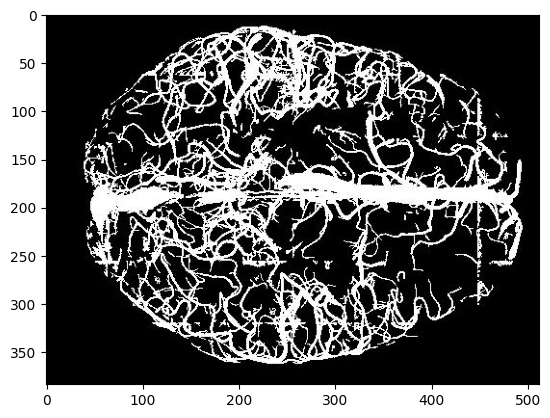

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../../data/predicted_label/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.figure()
plt.imshow(mip_image, cmap='gray')

Similar to the previous two modules (train.py and inference.py), if you set prep_mode to 1,2 or 3, which means both(1), denosing(2) or N4 bias field correction(3) will be applied to the input images, and you have to set a path to store the preprocessed images:

In [11]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --ps_path ./../../data/preprocessed/ --out_path ./../../data/predicted_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 1 --ep 50 --lr 1e-3 

./../../data/predicted_label/proxies/ does not exist.
./../../data/predicted_label/proxies/ has been created!
./../../data/predicted_label/finetuned/ does not exist.
./../../data/predicted_label/finetuned/ has been created!
TTA session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:28<00:00, 208.24s/it]
All processed images are successfully saved!
No proxies are provided, strating generating proxies...
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [01:57<00:00, 19.66s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii is successfully saved!

Prediction and thresholding procedure end!

Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/manual_ep5000_0621
Finetuning procedure starts!
Epoch: [1/50], Loss:  0.4341, Current learning rat

View the MIP image:

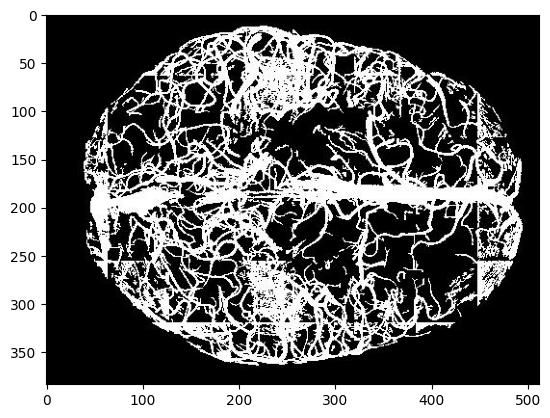

In [12]:
mip_image = img.imread("./../../data/predicted_label/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.figure()
plt.imshow(mip_image, cmap='gray')

### TTA with a specified proxy
You can provide a proxy segmentation which will be used for the test-time-adaption instead of the automatically generated proxies. This segmentation can be created using any methods, for example manual labelling or other, non-deep-learning methods. We will use the filenames to match the raw images and proxy segmentations. \
In the following example, we simply used the proxy segmentation generated by the previous section:


In [13]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --px_path ./../../data/predicted_label/proxies/ --out_path ./../../data/predicted_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 4 --ep 50 --lr 1e-3 

TTA session will start shortly..
Aborting the preprocessing procedure!

Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/manual_ep5000_0621
Finetuning procedure starts!
Epoch: [1/50], Loss:  0.5961, Current learning rate:  0.00100000                
Epoch: [2/50], Loss:  0.6695, Current learning rate:  0.00100000                
Epoch: [3/50], Loss:  0.8844, Current learning rate:  0.00100000                
Epoch: [4/50], Loss:  0.6673, Current learning rate:  0.00100000                
Epoch: [5/50], Loss:  0.6495, Current learning rate:  0.00100000                
Epoch: [6/50], Loss:  0.5272, Current learning rate:  0.00100000                
Epoch: [7/50], Loss:  0.7779, Current learning rate:  0.00100000                
Epoch: [8/50], Loss:  0.4462, Current learning rate:  0.00100000                
Epoch: [9/50], Loss:  0.4230, Current learning rate:  0.00100000                
Epoch: [10/50], Loss:  0.5980, Current learning rate:  0.00100000        

The mip of the generated segmentation:


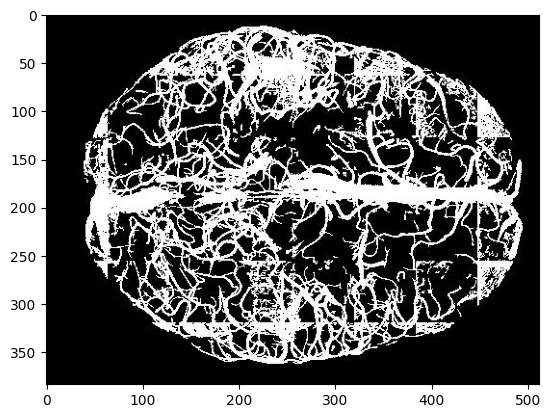

In [14]:
mip_image = img.imread("./../../data/predicted_label/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.figure()
plt.imshow(mip_image, cmap='gray')

Similarily, if you set prep_mode to 1,2 or 3, which means both(1), denosing(2) or N4 bias field correction(3) will be applied to the input images, and you have to set a path to store the preprocessed images:

In [15]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --px_path ./../../data/predicted_label/proxies/ --ps_path ./../../data/preprocessed/ --out_path ./../../data/predicted_label/ --pretrained ./../saved_models/manual_ep5000_0621 --prep_mode 1 --ep 50 --lr 1e-3 

TTA session will start shortly..
The preprocessing procedure is starting!

100%|████████████████████████████████████████████| 1/1 [03:15<00:00, 195.68s/it]
All processed images are successfully saved!
Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/manual_ep5000_0621
Finetuning procedure starts!
Epoch: [1/50], Loss:  0.7325, Current learning rate:  0.00100000                
Epoch: [2/50], Loss:  0.9344, Current learning rate:  0.00100000                
Epoch: [3/50], Loss:  0.6701, Current learning rate:  0.00100000                
Epoch: [4/50], Loss:  0.5319, Current learning rate:  0.00100000                
Epoch: [5/50], Loss:  0.5509, Current learning rate:  0.00100000                
Epoch: [6/50], Loss:  0.3553, Current learning rate:  0.00100000                
Epoch: [7/50], Loss:  0.6673, Current learning rate:  0.00100000                
Epoch: [8/50], Loss:  0.5114, Current learning rate:  0.00100000                
Epoch: [9/50], Loss:  0.5

To view the MIP:

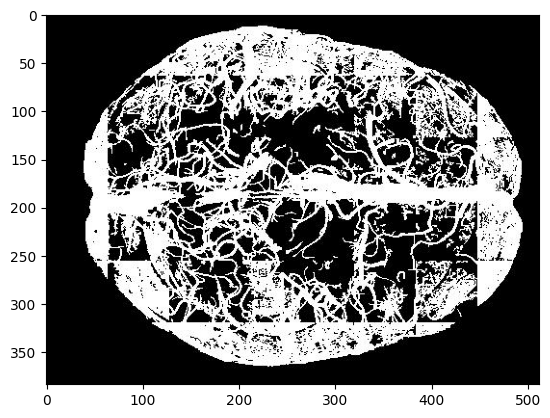

In [16]:
mip_image = img.imread("./../../data/predicted_label/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.jpg")
plt.figure()
plt.imshow(mip_image, cmap='gray')